<a href="https://colab.research.google.com/github/octaviamardiana/Kecerdasan-AI-sistem-kendali/blob/main/Kendali%20suhu%20ruang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 9.4 MB/s eta 0:00:00


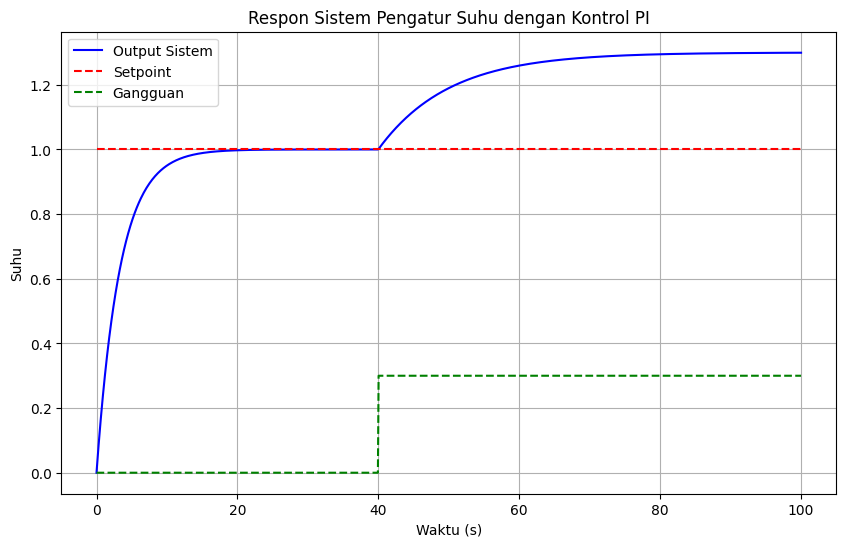

Pole sistem closed-loop: [-0.3+0.j -0.1+0.j]
Sistem stabil: True

Informasi Respon Step:
Waktu Penyelesaian: 13.26 s
Overshoot: 0.00 %
Error Steady-State: 0.0000
Waktu Pemulihan: 0.04 s


In [1]:
# Install library control
# Install the control library
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control

# Parameter sistem
num = [1]
den = [10, 1]
G = control.TransferFunction(num, den)

# Parameter kontroler PI
Kp = 3.0  # Gain proporsional
Ki = 0.3
C = control.TransferFunction([Kp, Ki], [1, 0])

# Sistem closed-loop
T = control.feedback(C * G, 1)

# Vektor waktu
t = np.linspace(0, 100, 1000)

# Respons step
t, y = control.step_response(T, T=t)

# Gangguan (disturbance) pada t=40
disturbance = np.zeros_like(t)
disturbance[t >= 40] = 0.3  # Gangguan 0.3 unit

# Sistem open-loop untuk gangguan
G_dist = G
t, y_dist = control.forced_response(G_dist, T=t, U=disturbance)

# Total respons (step + gangguan)
total_response = y + y_dist

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, total_response, 'b', label='Output Sistem')
plt.plot(t, np.ones_like(t), 'r--', label='Setpoint')
plt.plot(t, disturbance, 'g--', label='Gangguan')
plt.title('Respon Sistem Pengatur Suhu dengan Kontrol PI')
plt.xlabel('Waktu (s)')
plt.ylabel('Suhu')
plt.legend()
plt.grid(True)
plt.show()

# Analisis stabilitas
poles = control.poles(T)
print("Pole sistem closed-loop:", poles)
print("Sistem stabil:", all(np.real(poles) < 0))

# Metrik performa
info = control.step_info(T)
print("\nInformasi Respon Step:")
print(f"Waktu Penyelesaian: {info['SettlingTime']:.2f} s")
print(f"Overshoot: {info['Overshoot']:.2f} %")
print(f"Error Steady-State: {info['SteadyStateValue'] - 1:.4f}")

# Waktu pemulihan setelah gangguan
error = np.abs(total_response - 1)
recovery_indices = np.where((t > 40) & (error < 0.05))[0]
if len(recovery_indices) > 0:
    recovery_time = t[recovery_indices[0]] - 40
    print(f"Waktu Pemulihan: {recovery_time:.2f} s")
else:
    print("Sistem tidak pulih ke dalam 5% setpoint setelah gangguan.")
    print(f"Error minimum setelah t=40: {np.min(error[t > 40]):.4f}")